In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns


TRAIN_PATH = '123181_train_withF_cut0605.csv'
TEST_PATH = '123181_test_withF.csv'

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

print(train.columns)


Index(['Timestamp', 'Open', 'High', 'Low', 'Volume', 'Turnover', 'Close',
       'Avg', 'log_ret_close_1min', 'BBANDS_close_16min_up',
       'BBANDS_close_16min_mid', 'BBANDS_close_16min_low',
       'MACD_close_F12S26S9', 'RSI_close_12min', 'SAR', 'BB_hit_wall',
       'Target_Close_1min', 'Target_Avg_1min', 'STOCK_log_ret_close_1min',
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min', 'STOCK_SAR',
       'STOCK_BB_hit_wall'],
      dtype='object')


Train Model

In [10]:
def experiment(train, test, target):
    model = BayesianRidge()

    train_input = train[['MACD_close_F12S26S9', 'RSI_close_12min',
       'BB_hit_wall', 
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min', 'STOCK_BB_hit_wall']]
    
    test_input = test[['MACD_close_F12S26S9', 'RSI_close_12min',
       'BB_hit_wall', 
       'STOCK_MACD_close_F12S26S9', 'STOCK_RSI_close_12min', 'STOCK_BB_hit_wall']]

    model.fit(train_input, train[target])

    predictions = model.predict(test_input)

                
    # Results
    print(model.coef_)
    print("MSE: %5f"%mean_squared_error(test[target],predictions))
    print("R^2: %5f"%r2_score(test[target],predictions))


In [11]:
experiment(train = train, test = test, target= 'Target_Avg_1min')

[-5.90285728e-04  1.39750198e-04 -1.67770910e-06 -1.00339443e-03
  2.86380491e-04  2.47367314e-05 -1.46307138e-06 -2.37863259e-04]
MSE: 0.000004
R^2: -0.046424


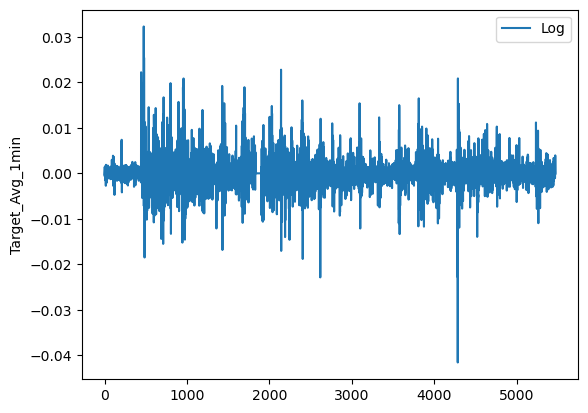

In [12]:
sns.lineplot(data=train['Target_Avg_1min'], label='Log')
plt.legend()
plt.show()